#### Importing modules

In [2]:
import numpy as np
import pandas as pd # Data processing
import matplotlib.pyplot as plt # Plotting
import seaborn as sns # Visualization
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

from colorama import init as colorama_init
from colorama import Fore
from colorama import Style
colorama_init()

#### Loading Data

In [3]:
df_2015 = pd.read_csv('Datasets/2015.csv', delimiter=',')
df_2016 = pd.read_csv('Datasets/2016.csv', delimiter=',')
df_2017 = pd.read_csv('Datasets/2017.csv', delimiter=',')
df_2018 = pd.read_csv('Datasets/2018.csv', delimiter=',')
df_2019 = pd.read_csv('Datasets/2019.csv', delimiter=',')

####  Description of Data

In [5]:
all_data = [df_2015, df_2016, df_2017, df_2018, df_2019]
years = [2015, 2016, 2017, 2018, 2019]
shape = (
    {"2015": {"Rows": df_2015.shape[0], "Columns": df_2015.shape[1]}},
    {"2016": {"Rows": df_2016.shape[0], "Columns": df_2016.shape[1]}},
    {"2017": {"Rows": df_2017.shape[0], "Columns": df_2017.shape[1]}},
    {"2018": {"Rows": df_2018.shape[0], "Columns": df_2018.shape[1]}},
    {"2019": {"Rows": df_2019.shape[0], "Columns": df_2019.shape[1]}}
)
shape

({'2015': {'Rows': 158, 'Columns': 12}},
 {'2016': {'Rows': 157, 'Columns': 13}},
 {'2017': {'Rows': 155, 'Columns': 12}},
 {'2018': {'Rows': 156, 'Columns': 9}},
 {'2019': {'Rows': 156, 'Columns': 9}})

#### Information of each years

In [6]:
for df, year in zip(all_data, years):
    print(f" {Fore.GREEN}Informations of {year}{Style.RESET_ALL}")
    print(df.info())

 Informations of 2015
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), obj

#### Null values of years

In [9]:
for df, year in zip(all_data, years):
    print('##########################')
    print(f" {Fore.GREEN}Null values of {year}{Style.RESET_ALL}")
    print(df.isnull().sum())

##########################
 Null values of 2015
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64
##########################
 Null values of 2016
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64
###

#### Categorization of Categorical and Numerical columns

In [ ]:
# I defined the numerical variables which has number of unique value less than 10 as a categorical variable.(numerical_but_categorical)
# And categorical variables which has number of unique value more than 20 as a numerical variable. (categorical_but_cardinal)

In [14]:
def col_summary(df, year):
    categorical_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
    numerical_but_categorical = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int64", "float64"]]
    categorical_but_cardinal = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category","object"]]
    numerical_cols = [col for col in df.columns if df[col].dtypes in ["int64", "float64"]]
    numerical_cols = [col for col in df.columns if col not in categorical_cols]
    print(f"{year}--> Categorical Variables: {categorical_cols}, Numerical But Categorical Variables: {numerical_but_categorical}, Categorical But Numerical Variables: {categorical_but_cardinal} ")

col_summary(df_2015, 2015)
print('\n')
col_summary(df_2016, 2016)
print('\n')
col_summary(df_2017, 2017)
print('\n')
col_summary(df_2018, 2018)
print('\n')
col_summary(df_2019, 2019)

2015--> Categorical Variables: ['Country', 'Region'], Numerical But Categorical Variables: [], Categorical But Numerical Variables: ['Country'] 


2016--> Categorical Variables: ['Country', 'Region'], Numerical But Categorical Variables: [], Categorical But Numerical Variables: ['Country'] 


2017--> Categorical Variables: ['Country'], Numerical But Categorical Variables: [], Categorical But Numerical Variables: ['Country'] 


2018--> Categorical Variables: ['Country or region'], Numerical But Categorical Variables: [], Categorical But Numerical Variables: ['Country or region'] 


2019--> Categorical Variables: ['Country or region'], Numerical But Categorical Variables: [], Categorical But Numerical Variables: ['Country or region'] 


### Analysis and Visualization

In [18]:
# Happiest and the most unhappy countries according to "Happiness Rank"

def rank(df, col1, col2):
    happy = df.loc[0:9, [col1, col2]]
    unhappy = df[-10:][[col1, col2]].iloc[::-1]
    print(f"Top 10 happiest Countries")
    print(happy, "\n")
    print(f"Top 10 most unhappy Countries")
    print(unhappy)
    
rank(df_2015, "Happiness Rank", "Country")   

Top 10 happiest Countries
   Happiness Rank      Country
0               1  Switzerland
1               2      Iceland
2               3      Denmark
3               4       Norway
4               5       Canada
5               6      Finland
6               7  Netherlands
7               8       Sweden
8               9  New Zealand
9              10    Australia 

Top 10 most unhappy Countries
     Happiness Rank       Country
157             158          Togo
156             157       Burundi
155             156         Syria
154             155         Benin
153             154        Rwanda
152             153   Afghanistan
151             152  Burkina Faso
150             151   Ivory Coast
149             150        Guinea
148             149          Chad


In [19]:
# Features contributions to happiness ranking in the world

top_ten_score = df_2019.nlargest(10,"Score").loc[:, ["Country or region", "Score"]]
top_ten_gdp = df_2019.nlargest(10,"GDP per capita").loc[:, ["Country or region", "GDP per capita"]]
top_ten_ss = df_2019.nlargest(10,"Social support").loc[:, ["Country or region", "Social support"]]
top_ten_h = df_2019.nlargest(10,"Healthy life expectancy").loc[:, ["Country or region", "Healthy life expectancy"]]
top_ten_f = df_2019.nlargest(10,"Freedom to make life choices").loc[:, ["Country or region", "Freedom to make life choices"]]
top_ten_g = df_2019.nlargest(10,"Generosity").loc[:, ["Country or region", "Generosity"]]
top_ten_c = df_2019.nsmallest(10,"Perceptions of corruption").loc[:, ["Country or region", "Perceptions of corruption"]]

In [48]:
from IPython.display import display_html 

df1_style = top_ten_score.style.set_table_attributes("style='display:inline-block; margin-right:5px;'").set_caption("Top 10 Score")
df2_style = top_ten_gdp.style.set_table_attributes("style='display:inline-block; margin-right:5px;'").set_caption("Top 10 Gdp")
df3_style = top_ten_ss.style.set_table_attributes("style='display:inline-block; margin-right:5px;'").set_caption("Top 10 Social Support")
df4_style = top_ten_h.style.set_table_attributes("style='display:inline-block; margin-right:5px;'").set_caption("Top 10 Healthy Life Expectancy")

display_html(df1_style._repr_html_() + df2_style._repr_html_() + df3_style._repr_html_() + df4_style._repr_html_(), raw=True)

,Country or region,Score
0,Finland,7.769000
1,Denmark,7.600000
2,Norway,7.554000
3,Iceland,7.494000
4,Netherlands,7.488000
5,Switzerland,7.480000
6,Sweden,7.343000
7,New Zealand,7.307000
8,Canada,7.278000
9,Austria,7.246000


#### Visualization with Seaborn

                                 Region      Ratio
Sub-Saharan Africa                   40  25.316456
Central and Eastern Europe           29  18.354430
Latin America and Caribbean          22  13.924051
Western Europe                       21  13.291139
Middle East and Northern Africa      20  12.658228
Southeastern Asia                     9   5.696203
Southern Asia                         7   4.430380
Eastern Asia                          6   3.797468
North America                         2   1.265823
Australia and New Zealand             2   1.265823
###################################################


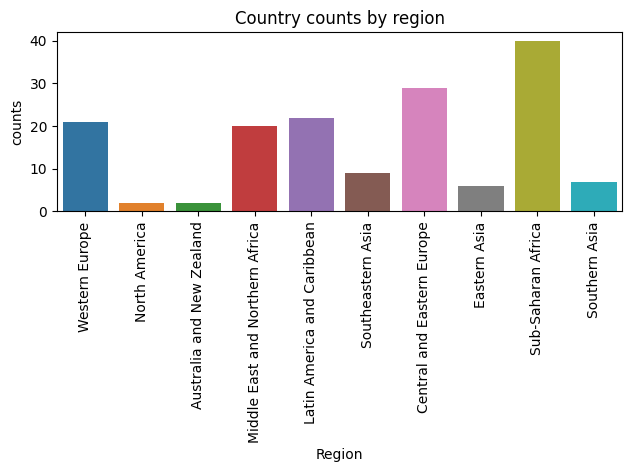

In [38]:
# For 2015's data, country counts by each region using countplot

def countries_by_region(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("###################################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title("Country counts by region")
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.tight_layout(pad=1.0, w_pad=10.0, h_pad=10.0)
        plt.show(block=True)

countries_by_region(df_2015, "Region", plot=True)

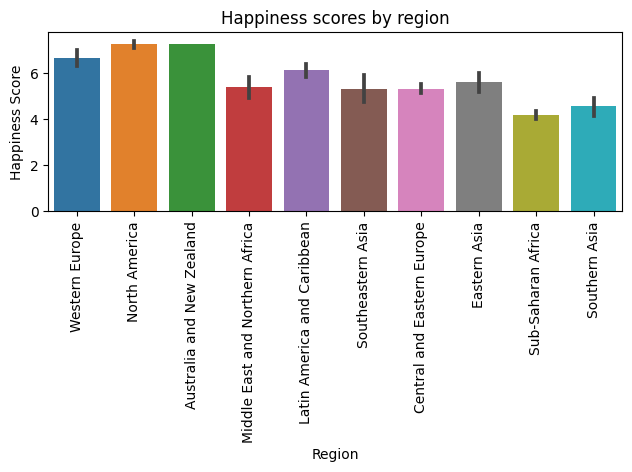

In [39]:
# Happiness scores by region for 2015's data

sns.barplot(x=df_2015["Region"], y=df_2015["Happiness Score"], data=df_2015)
plt.title("Happiness scores by region")
plt.xticks(rotation=90)
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.show(block=True)

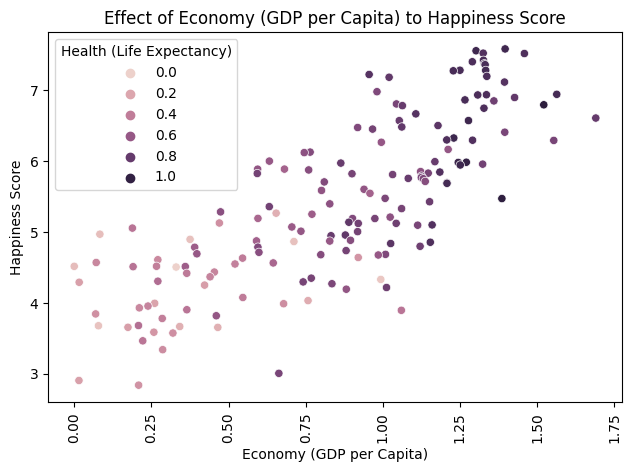

In [40]:
# Effect of Economy (GDP per Capita) and Life Expectancy to Happiness Score using scatterplot

sns.scatterplot(x=df_2015["Economy (GDP per Capita)"], y=df_2015["Happiness Score"], hue= df_2015["Health (Life Expectancy)"], data=df_2015)
plt.title("Effect of Economy (GDP per Capita) to Happiness Score")
plt.xticks(rotation=90)
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.show(block=True)

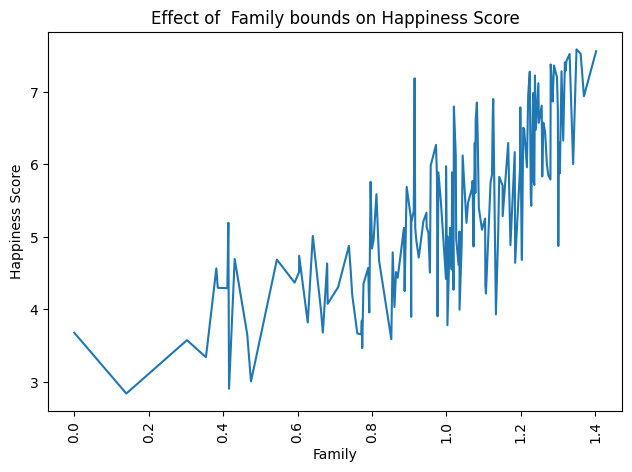

In [41]:
# Effect of Family bounds on Happiness Score using scatterplot

sns.lineplot(x=df_2015["Family"], y=df_2015["Happiness Score"], data=df_2015)
plt.title("Effect of  Family bounds on Happiness Score")
plt.xticks(rotation=90)
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.show(block=True)

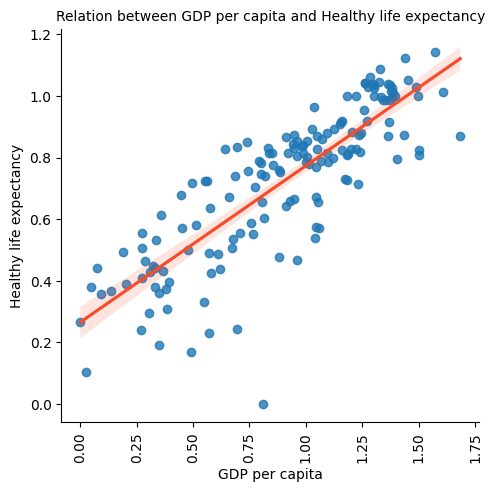

In [42]:
# Relation between GDP per capita and Healthy life expectancy

palette=["6096B4"]
sns.lmplot(data=df_2019,x="GDP per capita", y="Healthy life expectancy", line_kws={'color': '#F94A29'},palette=palette)
plt.title("Relation between GDP per capita and Healthy life expectancy", fontsize=10)
plt.xticks(rotation=90)
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.show(block=True)

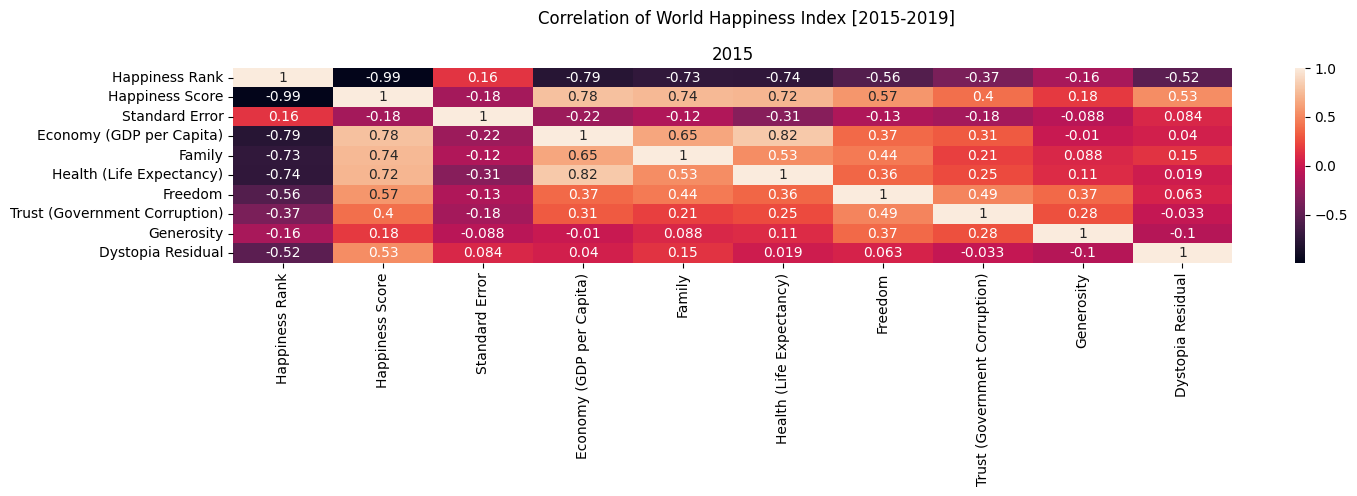

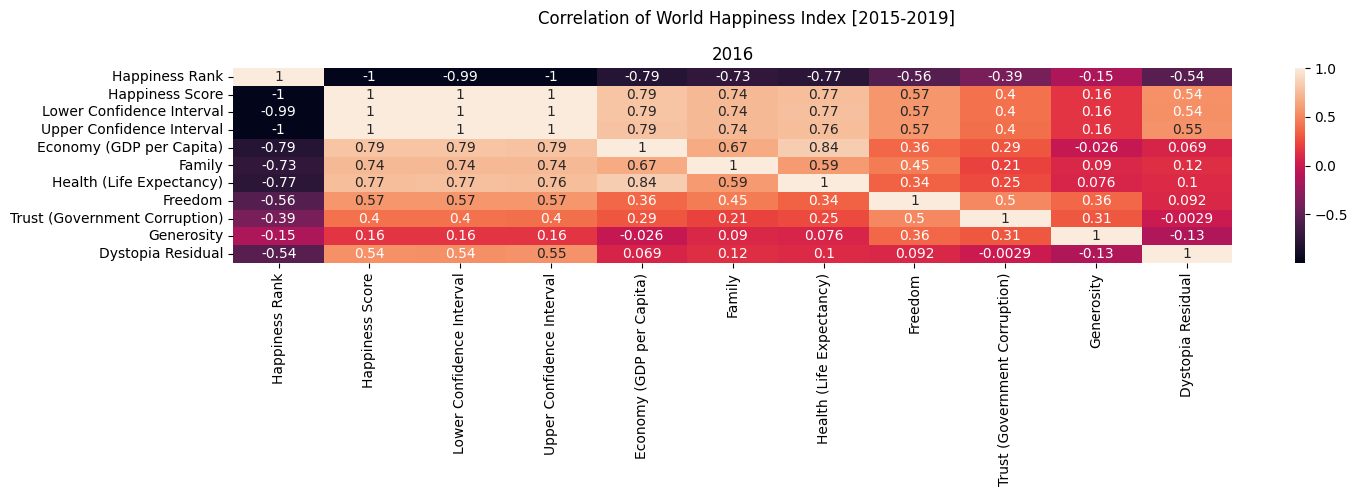

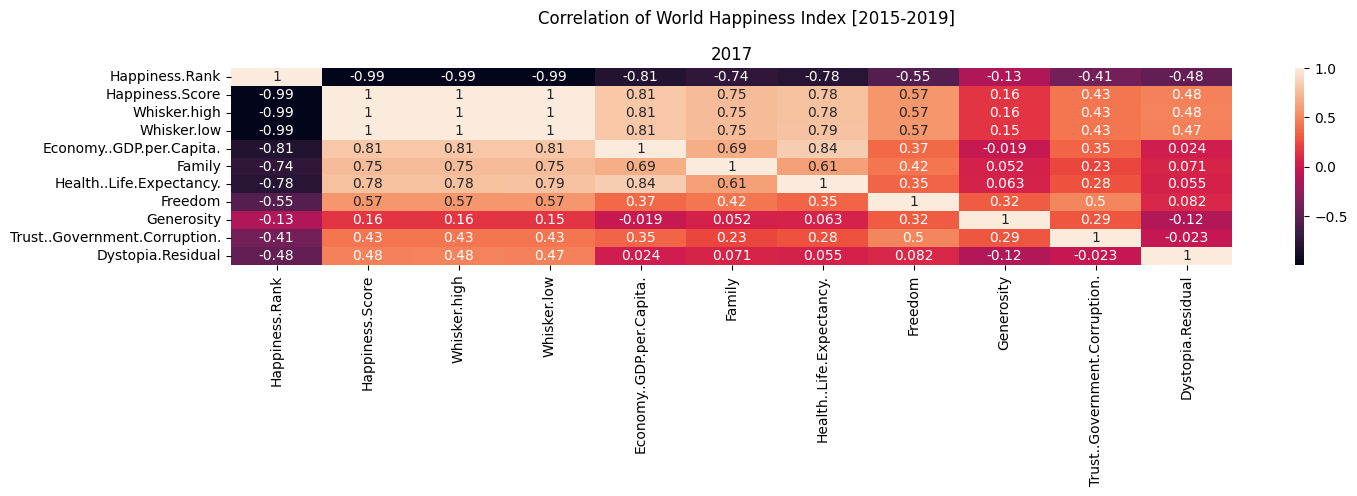

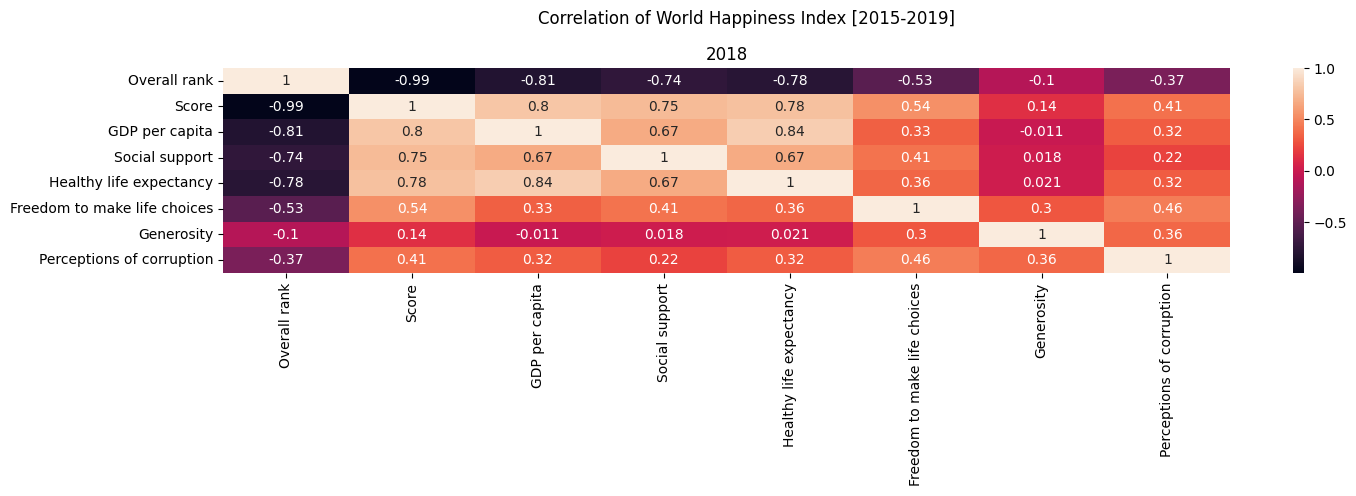

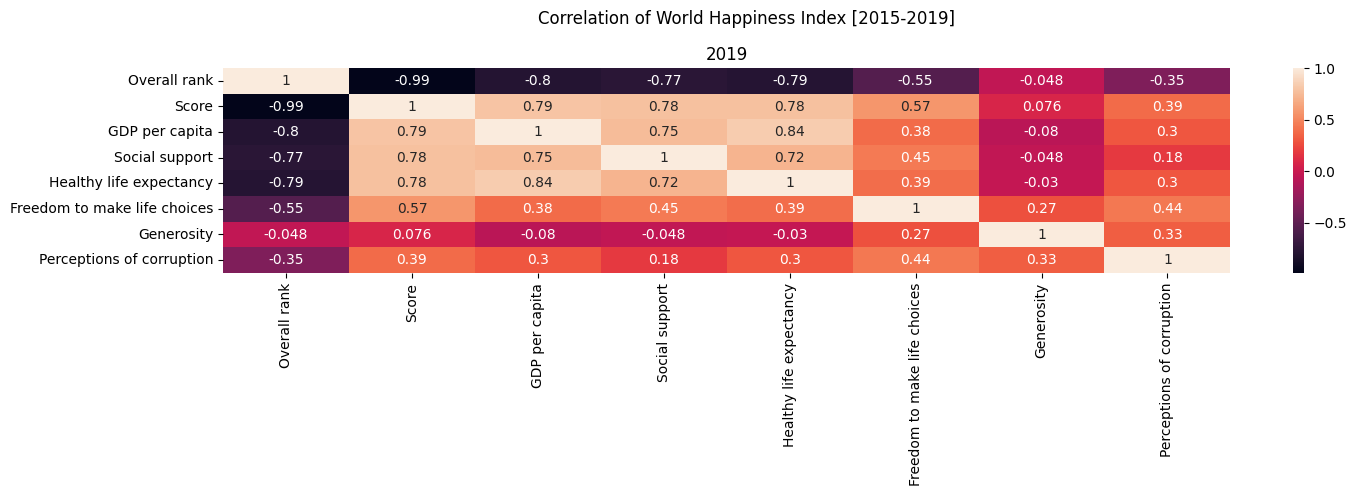

In [43]:
# Correlation of World Happiness Index using Heatmap [2015-2019]

for df, y in zip(all_data, years):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    sns.heatmap(df.corr(), annot=True).set_title(y)
    plt.suptitle("Correlation of World Happiness Index [2015-2019]")
    plt.xticks(rotation=90)
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show(block=True)

## Observations

###### 1 - Happiness score is highly correlated with Economy (GDP per Capita), Family, Health (Life Expectancy) and  less correlated with Generosity and Trust (Government Corruption).

###### 2 - GDP per capita is highly correlated with Score, Social support, Healthy life expectancy and less correlated with Freedom to make life choices, Generosity and Perceptions of corruption.

###### 3 - Freedom only correlated with Score and Happiness score.

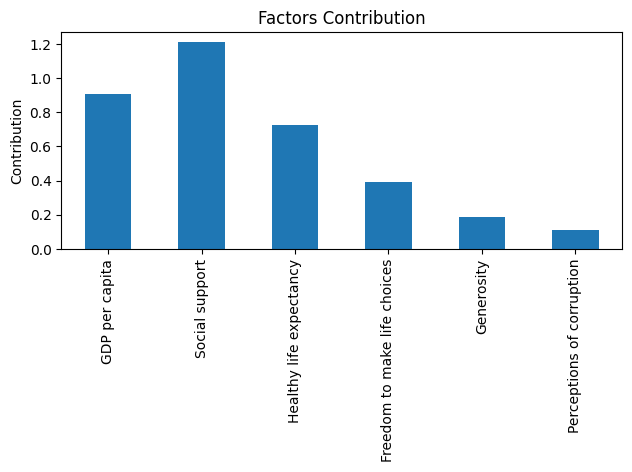

In [44]:
# Contribution of features to happiness ranking.(2019)

mean_2019 = df_2019.mean(numeric_only=True)
mean_2019.iloc[2:].plot(kind="bar", stacked=True)
plt.ylabel("Contribution")
plt.title("Factors Contribution")
plt.xticks(rotation=90)
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.show(block=True)